In [2]:
from d2l import torch as d2l
from torch import functional as F
from torch import nn
import torch

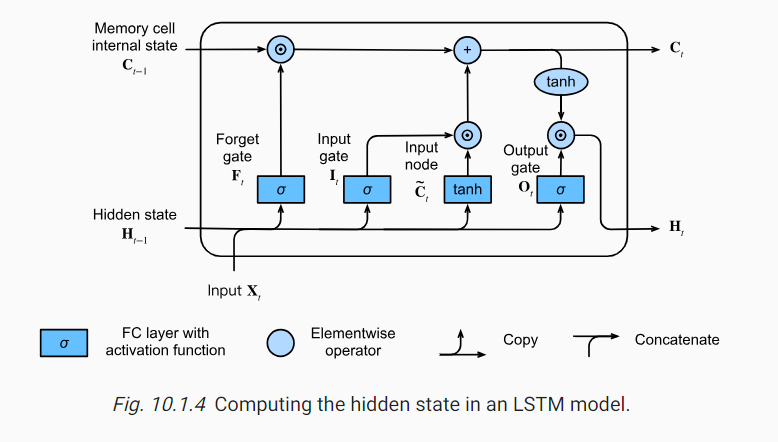

In [ ]:
class LSTMScratch(d2l.Module):
    def __init__(self, num_inputs, num_hiddens, sigma = 0.01):
        super().__init__()
        self.save_hyperparameters()

        init_weight = lambda *shape: nn.Parameter(torch.randn(*shape) * sigma)
        triple = lambda: (init_weight(num_inputs, num_hiddens), 
                          init_weight(num_hiddens, num_hiddens), 
                          nn.Parameter(torch.zeros(1, num_hiddens)))
        
        self.W_xi, self.W_hi, self.b_i = triple() # Input gate
        self.W_xf, self.W_hf, self.b_f = triple() # Forget gate
        self.W_xo, self.W_ho, self.b_o = triple() # Output gate
        self.W_xc, self.W_hc, self.b_c = triple() # Input node

    def forward(self, inputs, H_C = None):
        if H_C is None:
            # Initialize state with shape: (batch_size, num_hiddens)
            H = torch.zeros(inputs.shape[1], self.num_hiddens, device = inputs.device)
            C = torch.zeros(inputs.shape[1], self.num_hiddens, device = inputs.device)
        else:
            H, C = H_C

        outputs = []
        for X in inputs:
            F = torch.sigmoid(
                torch.mm(X, self.W_xf) + torch.mm(H, self.W_hf) + self.b_f)
            I = torch.sigmoid(
                torch.mm(X, self.W_xi) + torch.mm(H, self.W_hi) + self.b_i)
            C_tilde = torch.tanh(
                torch.mm(X, self.W_xc) + torch.mm(H, self.W_hc) + self.b_c)
            O = torch.sigmoid(
                torch.mm(X, self.W_xo) + torch.mm(H, self.W_ho) + self.b_o)

            C = C * F + I * C_tilde

            H = torch.tanh(C) * O
            outputs.append(H)

        return outputs, (H, C)

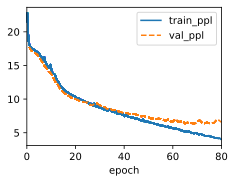

In [15]:
data = d2l.TimeMachine(batch_size=1024, num_steps=64)
lstm = LSTMScratch(num_inputs= len(data.vocab), num_hiddens = 128)
model = d2l.RNNLMScratch(lstm, len(data.vocab), lr = 4)
trainer = d2l.Trainer(max_epochs=80, num_gpus=1, gradient_clip_val=1)
trainer.fit(model, data)

In [17]:
model.predict(prefix = "time traveller is ", num_preds=64, vocab = data.vocab, device = d2l.try_gpu())

'time traveller is the prechical man and and the time traveller and the time travel'

#### Concise implementation


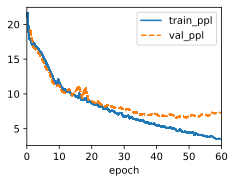

In [20]:
lstm = nn.LSTM(input_size = len(data.vocab), hidden_size = 128)
model = d2l.RNNLM(lstm, len(data.vocab), lr = 4)
trainer = d2l.Trainer(max_epochs = 60, num_gpus = 1, gradient_clip_val=1)
trainer.fit(model, data)

In [22]:
model.predict(prefix = "time traveller ", num_preds=64, vocab = data.vocab, device = d2l.try_gpu())

'time traveller we man the time time the time time to the get ous if the time tr'